<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


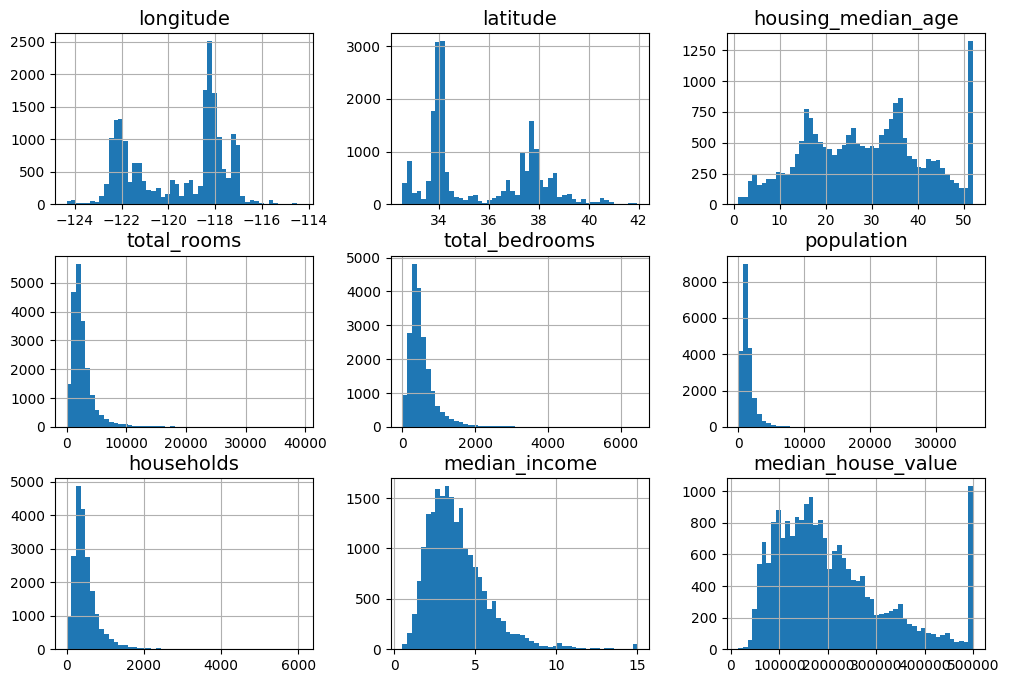

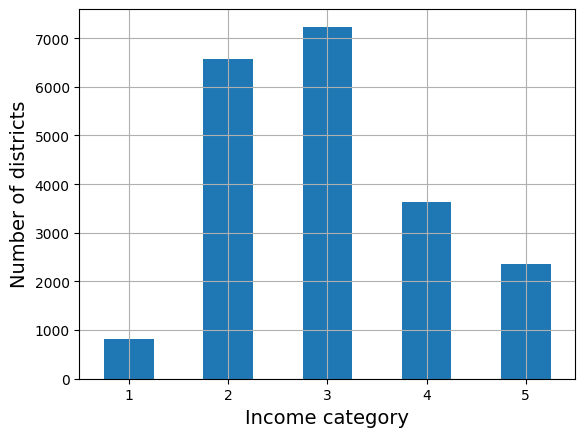

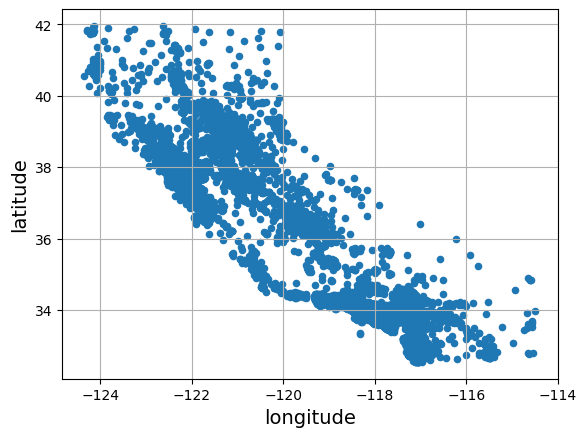

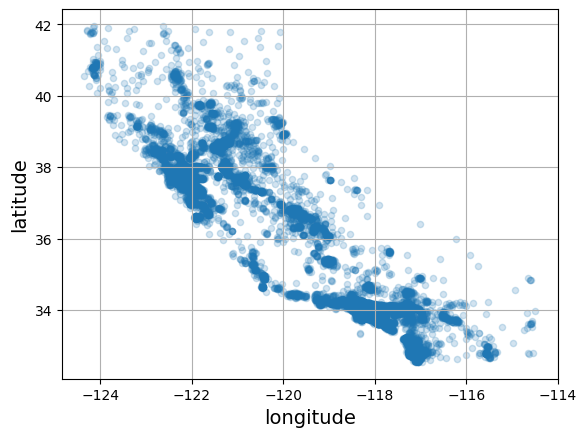

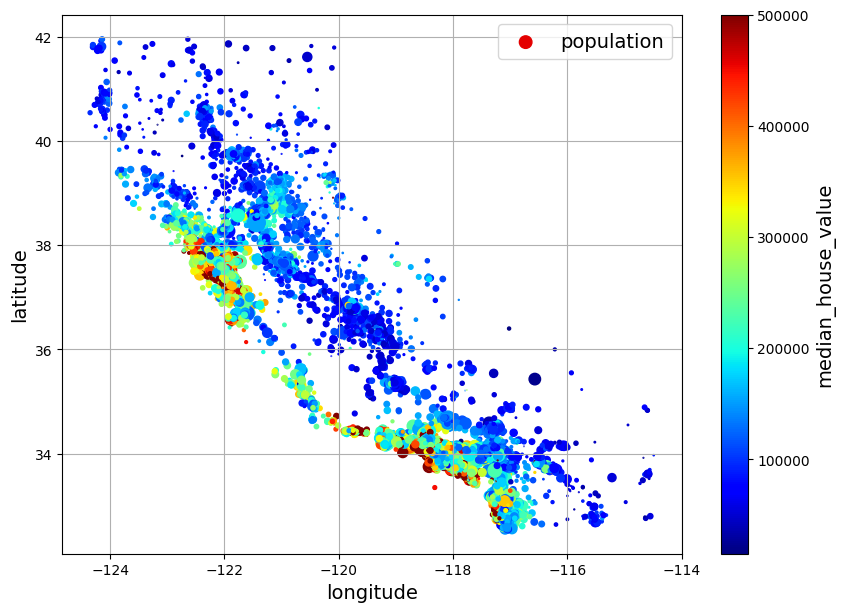

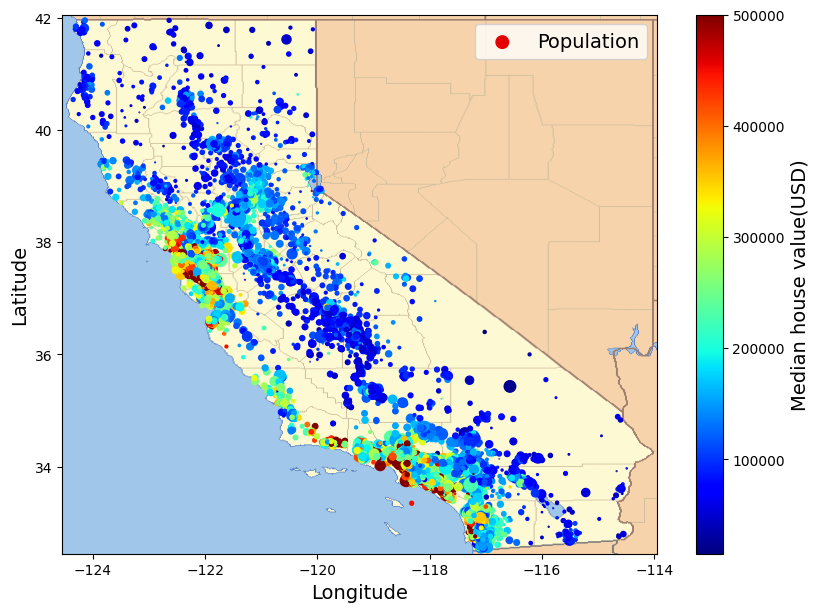

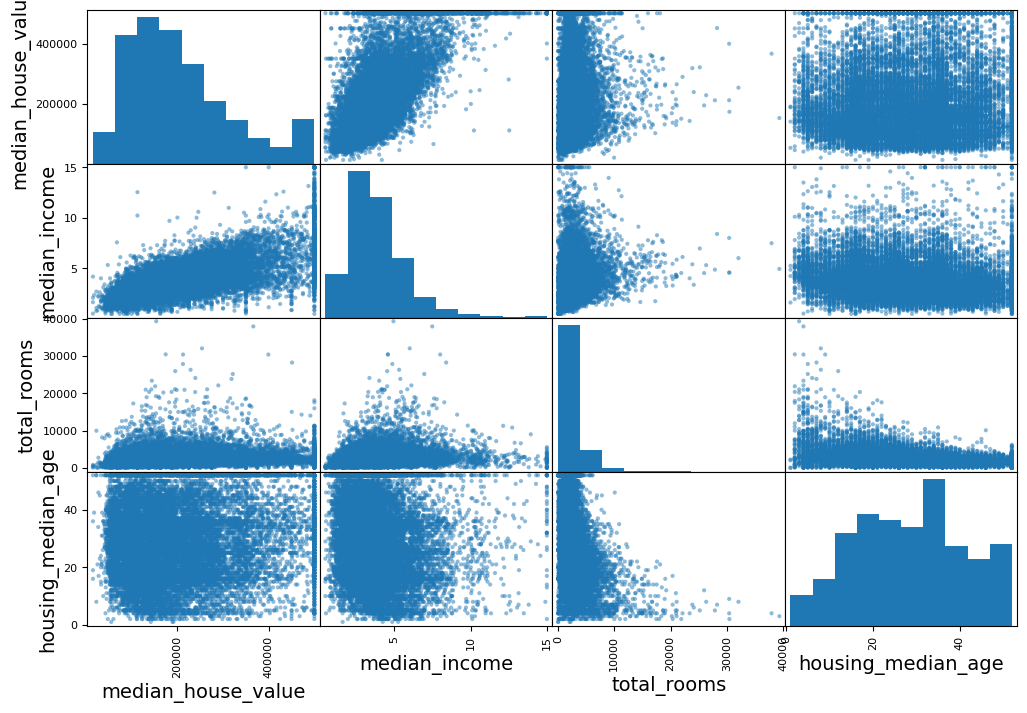

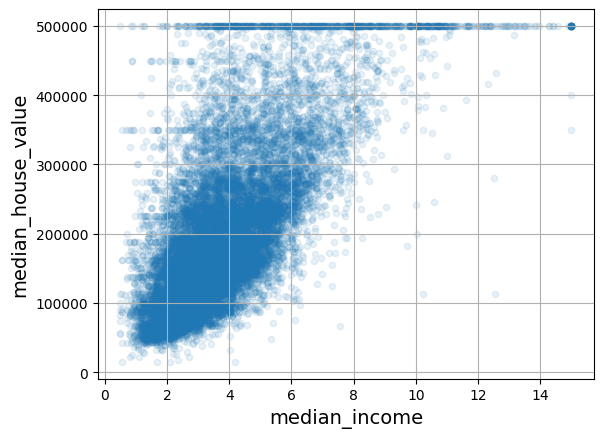

<ipython-input-35-8811ca605066>:130: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median,inplace=True)


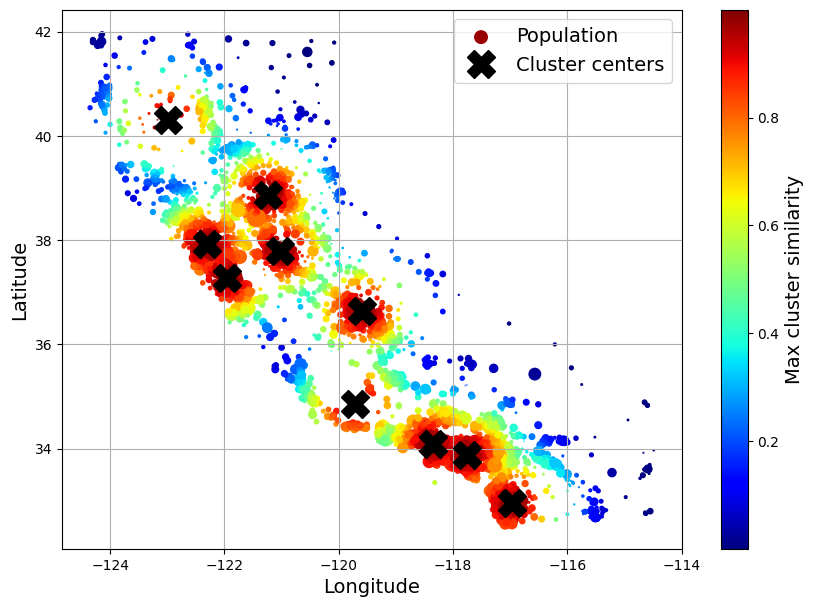

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
import sys
assert sys.version_info>=(3,7)

import sklearn
assert sklearn.__version__>="1.0.1"

import numpy as np

np.random.seed(42)

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path=Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

housing.head()

housing.info()

housing["ocean_proximity"].value_counts()

housing.describe()

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

from sklearn.model_selection import train_test_split

train_set, test_set=train_test_split(housing,test_size=0.2,random_state=42)

# Use np.inf instead of inf
housing['median_income'].hist(bins=1000, range=(0, 1))
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
housing

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

strat_train_set, strat_test_set=train_test_split(housing, test_size=0.2,stratify=housing["income_cat"],random_state=42)

def income_cat_proportions(data):
  return data["income_cat"].value_counts() / len(data)

train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)

compare_props=pd.DataFrame({"전체(%)":income_cat_proportions(housing),"계층 샘플링(%)":income_cat_proportions(strat_test_set),"무작위 샘플링(%)":income_cat_proportions(test_set)})
compare_props.sort_index="소득 구간"
compare_props["계층 샘플링 오류율(%)"]=(compare_props["계층 샘플링(%)"]/compare_props["전체(%)"]-1)
compare_props["무작위 샘플링 오류율(%)"]=(compare_props["무작위 샘플링(%)"]/compare_props["전체(%)"] - 1)
(compare_props * 100).round(2)

for set_ in(strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)

housing=strat_train_set.copy()
housing = housing.reset_index(drop=True)

housing.plot(kind="scatter",x="longitude",y="latitude",grid=True)
plt.show()

housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
plt.show()

housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,s=housing["population"]/100,label="population",c="median_house_value",cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,7))
plt.show()

filename="california.png"
if not (IMAGES_PATH/filename).is_file():
  homl3_root="https://github.com/ageron/handson-ml3/raw/main/"
  url=homl3_root+"images/end_to_end_project/"+filename
  print("Downloading",filename)
  urllib.request.urlretrieve(url,IMAGES_PATH/filename)

housing_renamed=housing.rename(columns={
    "latitude":"Latitude","longitude":"Longitude","population":"Population","median_house_value":"Median house value(USD)"})

housing_renamed.plot(kind="scatter",x="Longitude",y="Latitude",s=housing_renamed["Population"]/100,label="Population",c="Median house value(USD)",cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,7))

california_img=plt.imread(IMAGES_PATH/filename)
axis=-124.55,-113.95,32.45,42.05 #x축 y축 눈금
plt.axis(axis)
plt.imshow(california_img,extent=axis)
plt.show

corr_matrix=housing.corr(numeric_only=True)
corr_matrix

corr_matrix["median_house_value"].sort_values(ascending=False)

from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,grid=True)
plt.show()

null_rows_idx=housing.isnull().any(axis=1)
null_rows_idx

housing.loc[null_rows_idx].head()

housing.loc[null_rows_idx].shape

median=housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median,inplace=True)

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

housing_num=housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)
imputer.statistics_

X=imputer.transform(housing_num)
X

X=imputer.fit_transform(housing_num)
X

housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr.loc[null_rows_idx].head()

#입력 데이터셋 지정
housing=strat_train_set.drop("median_house_value",axis=1)
#타깃 데이터셋 지정
housing_labels=strat_train_set["median_house_value"].copy()

housing_cat=housing[["ocean_proximity"]]

from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

housing_cat_1hot
housing_cat_1hot.toarray()

cat_encoder=OneHotEncoder(sparse_output=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

cat_encoder.categories_
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

housing_cat_onehot=pd.DataFrame(housing_cat_1hot, columns=cat_encoder.get_feature_names_out(),index=housing_cat.index)
housing_cat_onehot

from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)

from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_num)

from sklearn.preprocessing import FunctionTransformer
log_transformer=FunctionTransformer(np.log,feature_names_out="one-to-one")

ratio_transformer=FunctionTransformer(lambda X: X[:, [0]]/X[:,[1]])

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self,n_clusters=10,gamma=1.0,random_state=None):
    self.n_clusters=n_clusters
    self.gamma=gamma
    self.random_state=random_state

  # Indent fit method within the class definition
  def fit(self,X,y=None,sample_weight=None):
    self.kmeans_=KMeans(self.n_clusters,random_state=self.random_state,n_init=10).fit(X,sample_weight=sample_weight)
    return self

  # Indent transform method within the class definition
  def transform(self,X):
    return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma)

  def get_feature_names_out(self,names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

housing['median_income']

cluster_simil=ClusterSimilarity(n_clusters=10,gamma=1.,random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],sample_weight=housing['median_income'])

similarities[:5].round(2)

housing_renamed=housing.rename(columns={"latitude":"Latitude","longitude":"Longitude","population":"Population","median_house_value":"Median house value(USD)"})
housing_renamed["Max cluster similarity"]=similarities.max(axis=1)
housing_renamed.plot(kind="scatter",x="Longitude",y="Latitude",grid=True,s=housing_renamed["Population"]/100,label="Population", c="Max cluster similarity", cmap="jet",colorbar=True,legend=True, sharex=False, figsize=(10,7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:,1],cluster_simil.kmeans_.cluster_centers_[:,0],linestyle="",color="black",marker="X",markersize=20,label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

from sklearn.pipeline import Pipeline
num_pipeline=Pipeline([("impute",SimpleImputer(strategy="median")),("standardize",StandardScaler()),])

from sklearn.pipeline import make_pipeline

num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

housing_num_prepared=num_pipeline.fit_transform(housing_num)
num_pipeline.get_feature_names_out()

df_housing_num_prepared = pd.DataFrame(housing_num_prepared,
                                       columns=num_pipeline.get_feature_names_out(),
                                       index=housing_num.index)
df_housing_num_prepared.head()

from sklearn.compose import ColumnTransformer
num_attribs=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
cat_attribs=["ocean_proximity"]

cat_pipeline=make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing=ColumnTransformer([("num",num_pipeline,num_attribs),("cat",cat_pipeline,cat_attribs),])

from sklearn.compose import make_column_selector
preprocessing=ColumnTransformer([("num",num_pipeline,make_column_selector(dtype_include=np.number)),("cat",cat_pipeline,make_column_selector(dtype_include=object))])

housing_prepared=preprocessing.fit_transform(housing)

preprocessing.get_feature_names_out()

from sklearn.compose import make_column_transformer
preprocessing=make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include=np.number)),(cat_pipeline,make_column_selector(dtype_include=object)),
    )
housing_prepared=preprocessing.fit_transform(housing)
preprocessing.get_feature_names_out()

housing_prepared_fr = pd.DataFrame(housing_prepared,
                                   columns=preprocessing.get_feature_names_out(),
                                   index=housing.index)

housing_prepared_fr.head()

def column_ratio(X):
  return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer,feature_names_in):
  return ["ratio"]

ratio_pipeline=make_pipeline(
    SimpleImputer(strategy="median"), FunctionTransformer(column_ratio,feature_names_out=ratio_name),
    StandardScaler()
)

log_pipeline=make_pipeline(
    SimpleImputer(strategy="median"),FunctionTransformer(np.log,feature_names_out="one-to-one"),
    StandardScaler()
)

cluster_simil=ClusterSimilarity(n_clusters=10,gamma=1.,random_state=42)

default_num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

preprocessing=ColumnTransformer([
    ("bedrooms",ratio_pipeline,["total_bedrooms","total_rooms"]),
    ("rooms_per_house",ratio_pipeline,["total_rooms","households"]),
    ("people_per_house",ratio_pipeline,["population","households"]),
    ("log",log_pipeline,["total_bedrooms","total_rooms","population","households","median_income"]),
    ("geo",cluster_simil,["latitude","longitude"]),
    ("cat",cat_pipeline,make_column_selector(dtype_include=object)),],remainder=default_num_pipeline)

housing_prepard=preprocessing.fit_transform(housing)
housing_prepared.shape
preprocessing.get_feature_names_out()
housing_prepared

